# Exercise 3.2

## Assignment 1.
Use the UCI mushroom set and use feature selection to find the most discriminitave features.

In [185]:
# Import pandas and import the dataset.
import pandas as pd

data = pd.read_csv('shrooms.data')
data['edible'] = [int(b) for b in data['edible'] == 'p']
y = data['edible']
x = data.iloc[:, 1:]

In [186]:
# Import sklearn stuff to select the bst features.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np

Because of the categorical data found in X, we'll have to convert the data to dummy variables. Because of this, the chosen features might look strange when we could get just 1 or 2 features from the same category while more might be present in the originial x.

In [305]:
# Selecting the N best features.
N = 2
skb = SelectKBest(chi2, k=N)
dummy_x = pd.get_dummies(x)
skb.fit(dummy_x, y)

x_new = skb.transform(dummy_x)
print(x_new.shape)
np.array(list(dummy_x.columns))[skb.get_support(indices=True)]

(8124, 2)


array(['odor_f', 'odor_n'], dtype='<U26')

The feature selection decides that the three best features to use is odor_f, ofor_n, and stalk-surface-above-ring_k.

## Assignment 2
Use PCA to make a reduced space.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

<IPython.core.display.Javascript object>


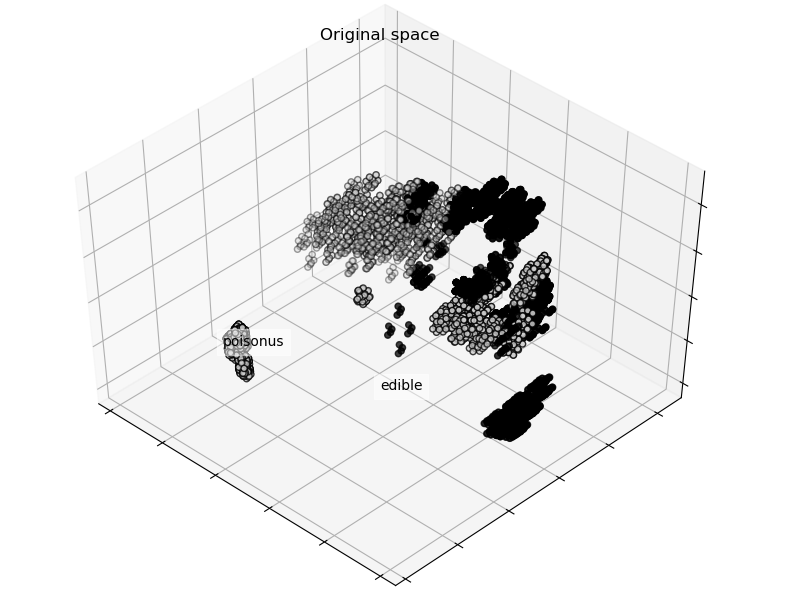

Original features (pixel index):  [28, 37, 89]
      odor_p  gill-color_b  ring-number_t
0          1             0              0
1          0             0              0
2          0             0              0
3          1             0              0
4          0             0              0
...      ...           ...            ...
8119       0             0              0
8120       0             0              0
8121       0             0              0
8122       0             1              0
8123       0             0              0

[8124 rows x 3 columns]


In [280]:
%matplotlib notebook
centers = [[1, 1], [-1, -1], [1, -1]]
pca = decomposition.PCA(n_components=3)
pca.fit(dummy_x)
pca_x = pca.transform(dummy_x)

# Fixing y vector so it works.

X = np.array(dummy_x)

# Plotting original
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

f = sorted(np.random.permutation(dummy_x.shape[1])[1:4])

for name, label in [('edible', 0), ('poisonus', 1)]:
    ax.text3D(pca_x[y == label, 0].mean(),
              pca_x[y == label, 1].mean() + 2,
              pca_x[y == label, 2].mean(),
              name, horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

Y = np.choose(y, [1, 2, 0]).astype(np.float)

ax.scatter(pca_x[:, 0], pca_x[:, 1], pca_x[:, 2], c=Y, cmap=plt.cm.nipy_spectral,
          edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title("Original space")

plt.draw()
plt.show()
print("Original features (pixel index): ",f)
# Let's see which features were chosen for our PCA scatterplot.
print(dummy_x.iloc[:, f])